In [6]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "C:\\Users\\admin\\git\\aiclass\\0.Professor\\")

import tensorflux.graph as tfg
import tensorflux.CNN as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.30.1


In [7]:
"""
    conv0 (batch_normal0, relu0) - pool1 - 
    conv2 (batch_normal2, relu2) - pool3 - 
    affine4 (relu4) - affine5 - softmax (output)
"""

input_dim = (1, 28, 28)
cnn_param_list = [
    {'type': 'conv', 'filter_num': 3, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
    {'type': 'conv', 'filter_num': 3, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
]
fc_hidden_size = 64
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.CNN(
    input_dim=input_dim,
    cnn_param_list=cnn_param_list,
    fc_hidden_size=fc_hidden_size,
    output_size=output_size,
    input_node=x,
    target_node=target,
    use_batch_normalization=True,
    conv_initializer=tfe.Initializer.Conv_Xavier_Normal.value,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    # initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Convolutional Neural Network Model - ID: GEVVVVWF
Data Size: (1, 28, 28)
         |
[Convolution Layer 0]
Param Key: W0, Shape: (3, 1, 3, 3)
Param Key: b0, Shape: (3,)
Data Size: (3, 28, 28)
         |
[Batch Normalization 0]
Param Key: gamma0, Shape: (1, 1)
Param Key: beta0, Shape: (1, 1)
Data Size: (3, 28, 28)
         |
[Activation Layer 0]
Data Size: (3, 28, 28)
         |
[Pooling Layer 1]
Data Size: (3, 14, 14)
         |
[Convolution Layer 2]
Param Key: W2, Shape: (3, 3, 3, 3)
Param Key: b2, Shape: (3,)
Data Size: (3, 14, 14)
         |
[Batch Normalization 2]
Param Key: gamma2, Shape: (1, 1)
Param Key: beta2, Shape: (1, 1)
Data Size: (3, 14, 14)
         |
[Activation Layer 2]
Data Size: (3, 14, 14)
         |
[Pooling Layer 3]
Data Size: (3, 7, 7)
         |
[Reshape Layer]
Data Size: 147
         |
[Affine Layer 4]
Param Key: W4, Shape: (147, 64)
Param Key: b4, Shape: (64,)
Data Size: 64
         |
[Activation Layer 4]
Data Size: 64
         |
[Affine Layer 5]
Param Key: W5, 

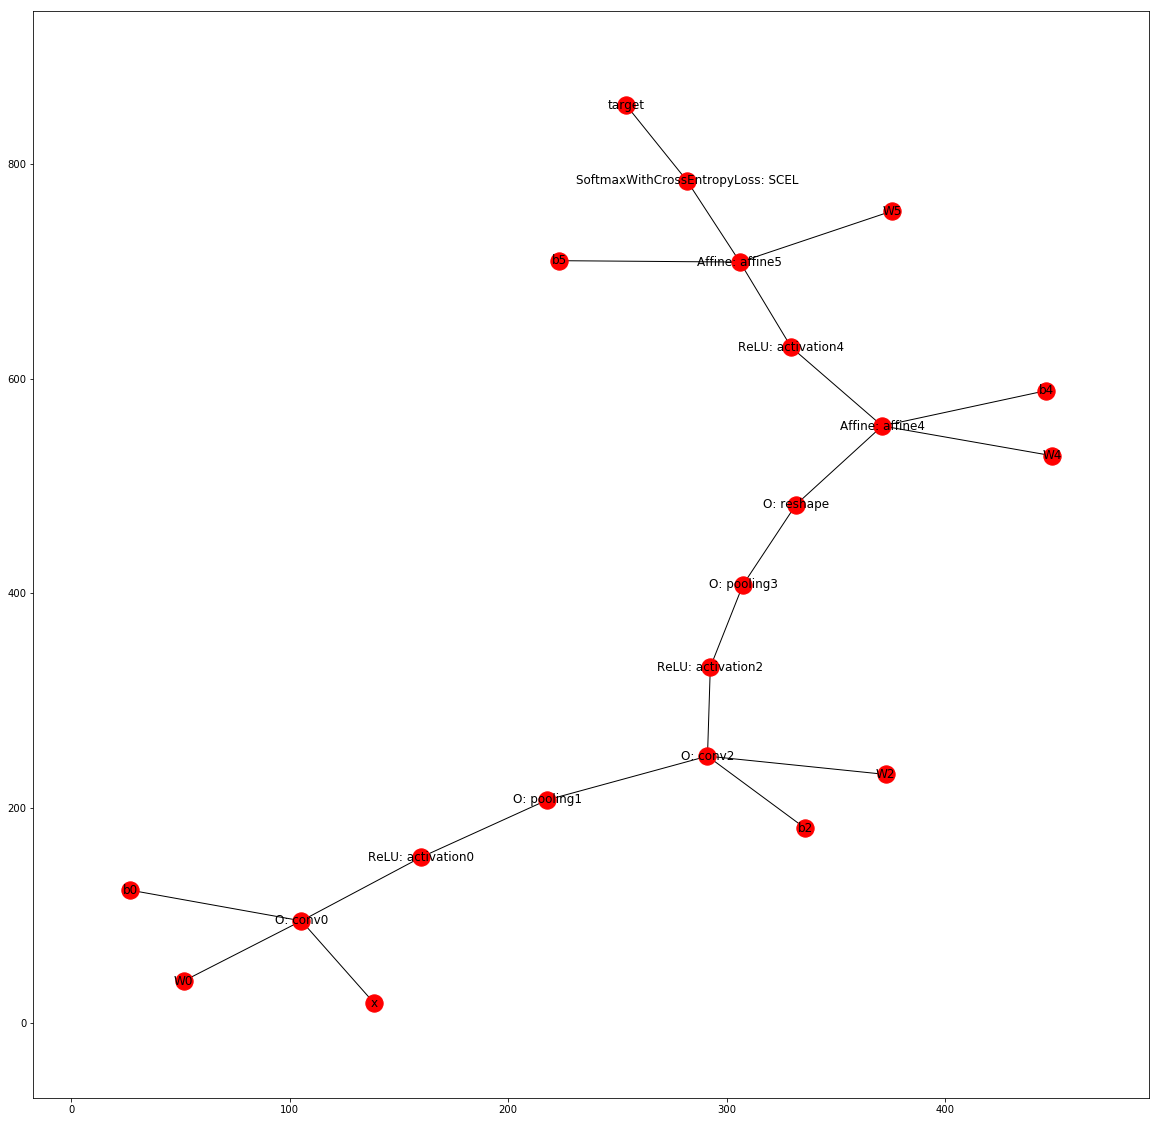

In [3]:
n.draw_and_show(figsize=(20, 20))

[Convolution Layer 0]
(3, 3)
(3, 3)
(3, 3)


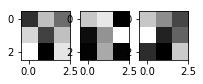

[Convolution Layer 2]
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)


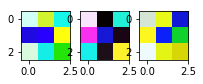

In [8]:
n.draw_filters(figsize=(20, 5))

In [9]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


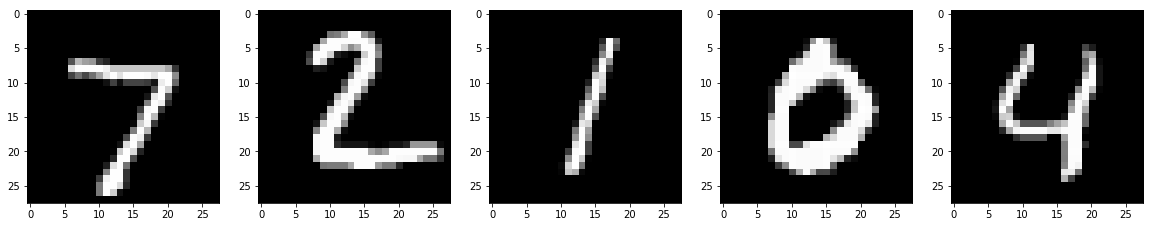

[Convolution Layer: conv0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


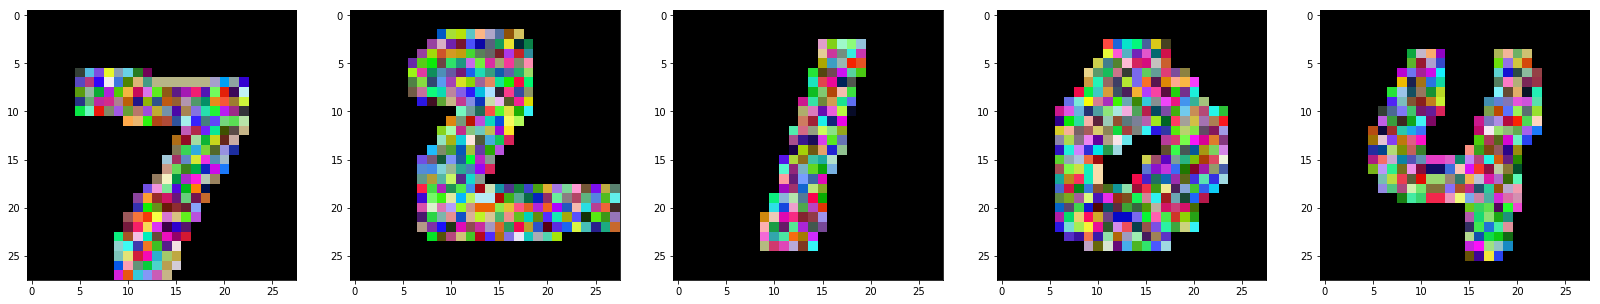

[Activation Layer: activation0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


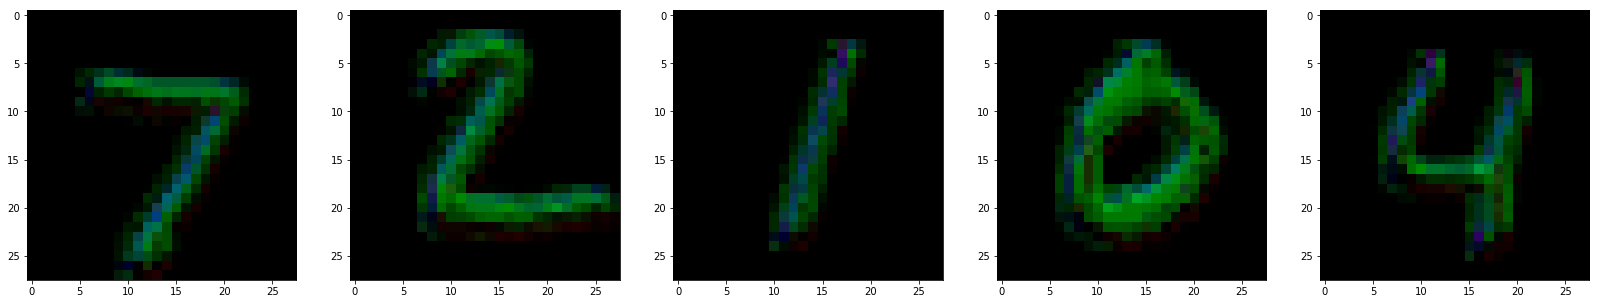

[Pooling Layer: pooling1]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


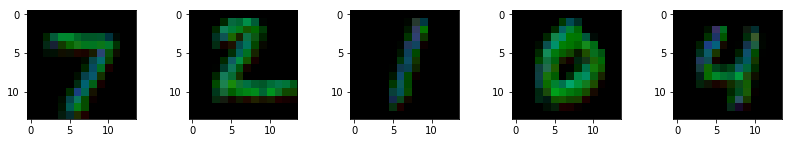

[Convolution Layer: conv2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


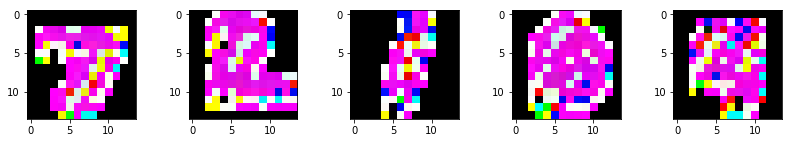

[Activation Layer: activation2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


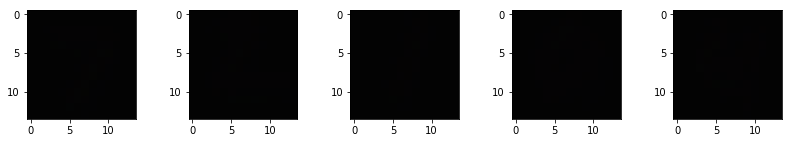

[Pooling Layer: pooling3]
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)


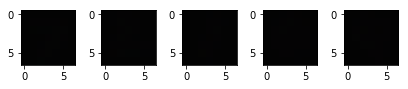

[Pooling Layer: reshape]
(1, 147)
(1, 147)
(1, 147)
(1, 147)
(1, 147)


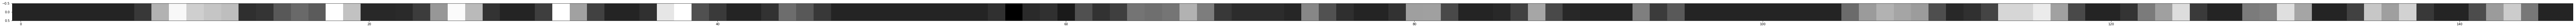

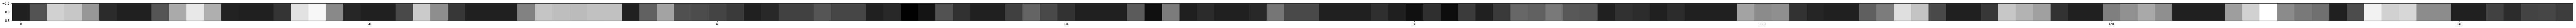

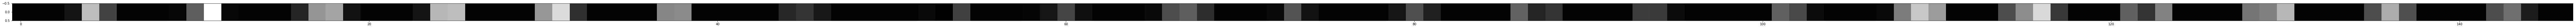

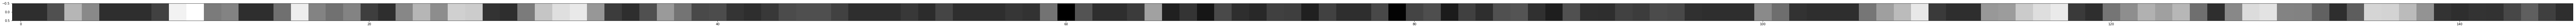

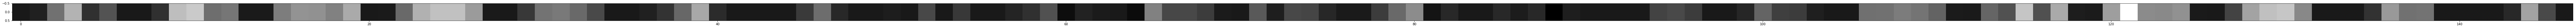

[Affine Layer: affine4]
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


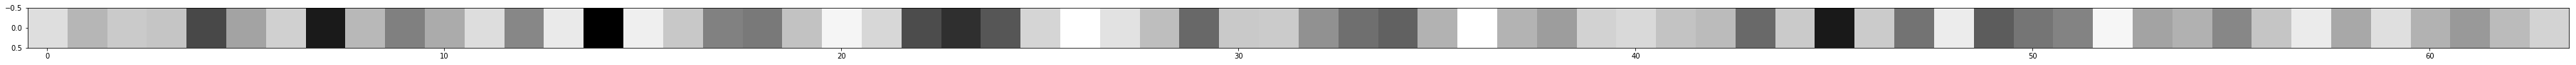

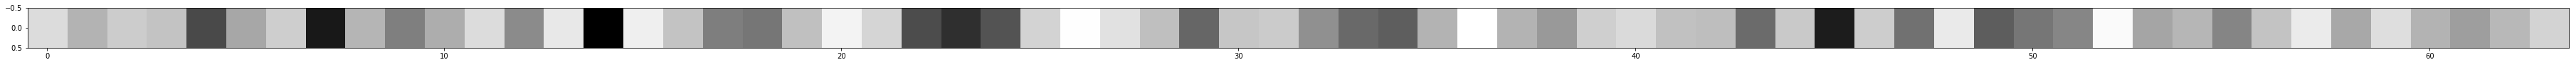

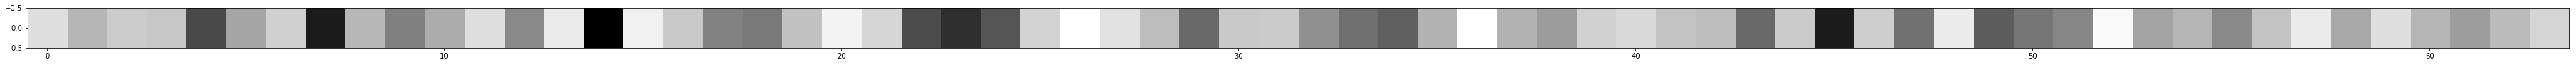

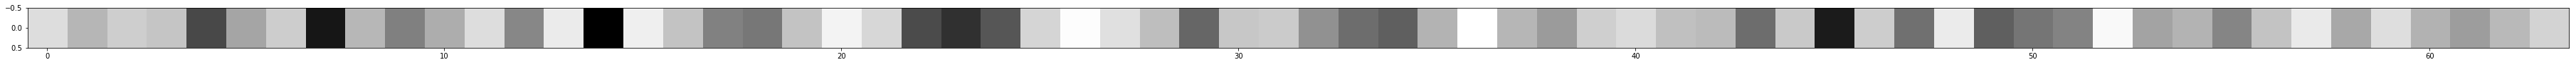

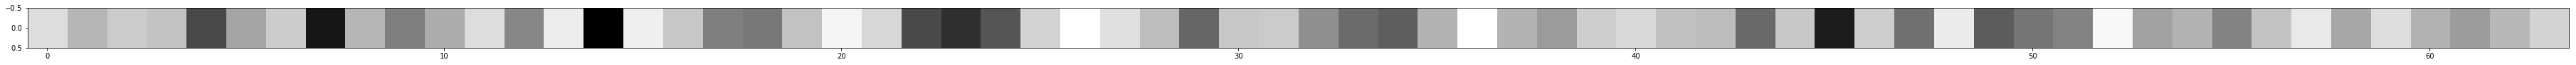

[Affine Layer: affine5]
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


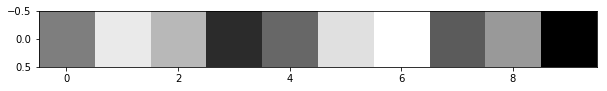

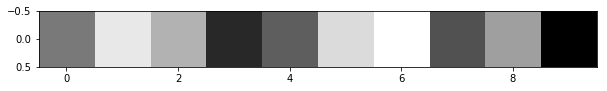

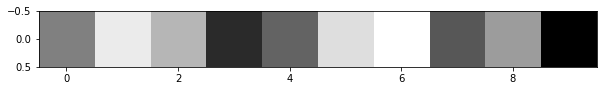

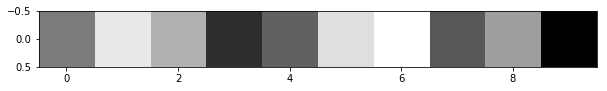

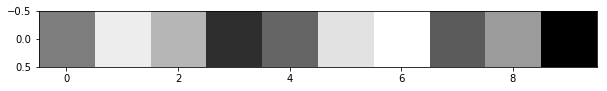

[Softmax Layer]
(1, 10) : [[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
(1, 10) : [[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
(1, 10) : [[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
(1, 10) : [[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
(1, 10) : [[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


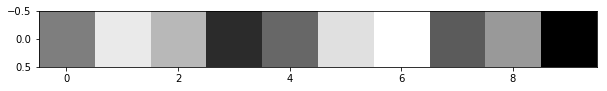

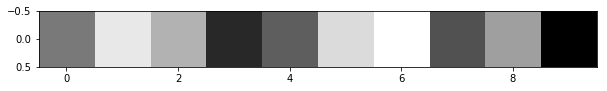

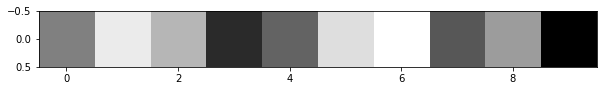

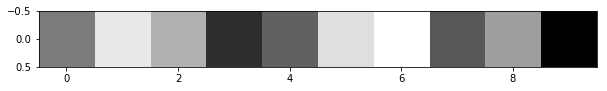

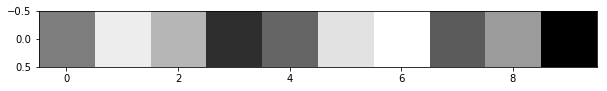

In [10]:
n.draw_filtered_images(test_inputs=data.test_input[:5], figsize=(20, 5))

In [7]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=5, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=False, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1099
-- Learning Started --
Epoch   0 Completed - Train Error:2.29837 - Validation Error:2.29304 - Test Accuracy:0.10990 <== Minimal Val. Error
Fold:  0
Epoch   1 Completed - Train Error:0.27574 - Validation Error:0.25722 - Test Accuracy:0.92380 <== Minimal Val. Error
Epoch   2 Completed - Train Error:0.18454 - Validation Error:0.17990 - Test Accuracy:0.94530 <== Minimal Val. Error
Epoch   3 Completed - Train Error:0.14612 - Validation Error:0.14947 - Test Accuracy:0.95260 <== Minimal Val. Error
Epoch   4 Completed - Train Error:0.15938 - Validation Error:0.13678 - Test Accuracy:0.95500 <== Minimal Val. Error
Epoch   5 Completed - Train Error:0.12420 - Validation Error:0.12703 - Test Accuracy:0.95840 <== Minimal Val. Error

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  5 (Fold:  0 & Epoch:  5) - Train Error:0.12420 - Validation Error:0.12703 - Test Accuracy:0.95840

Fold:  1
Epoch   1 Completed - Train Error:0.13152 - Validation Error:0.

In [8]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Validation Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch: 60, Min Train Error:0.02402, Min Validation Error:0.02293, Test Accuracy:0.97590
Mean of Min Validation Error For All Folds:0.06112


[Convolution Layer 0]
(3, 3)
(3, 3)
(3, 3)


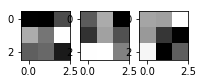

[Convolution Layer 2]
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)


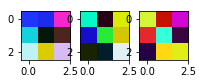

In [9]:
n.draw_filters(figsize=(20, 5))

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


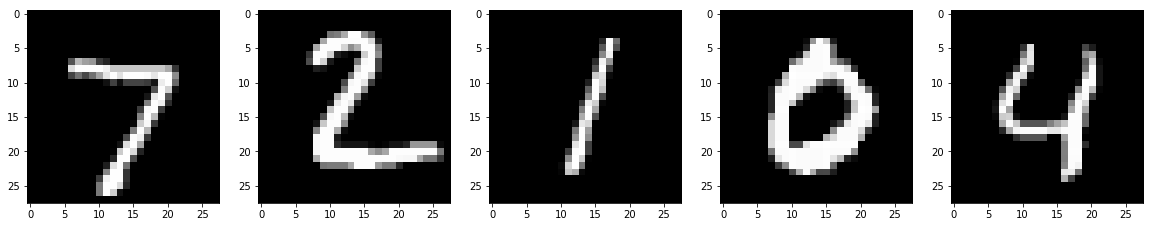

[Convolution Layer: conv0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


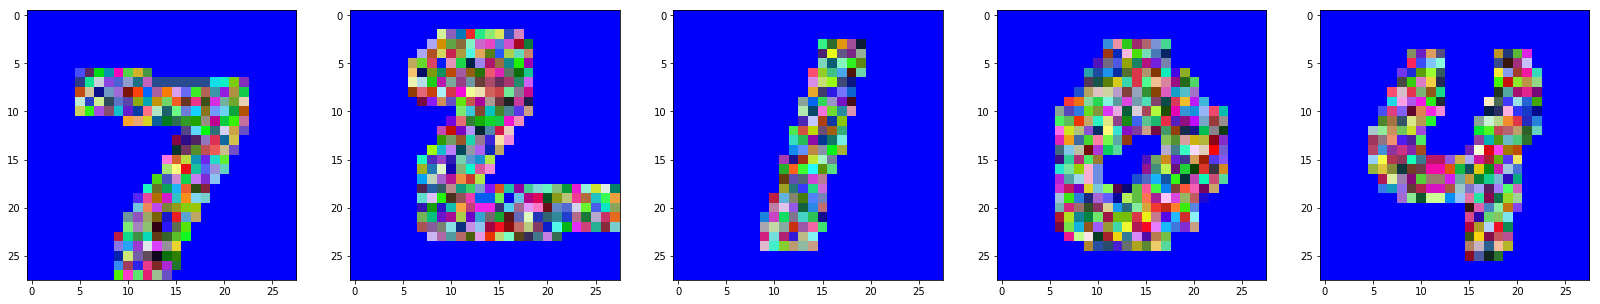

[Activation Layer: activation0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


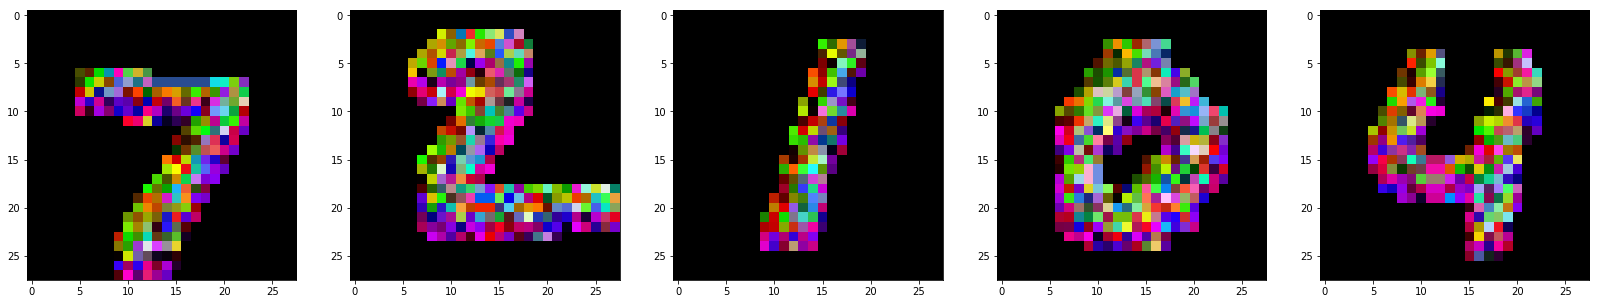

[Pooling Layer: pooling1]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


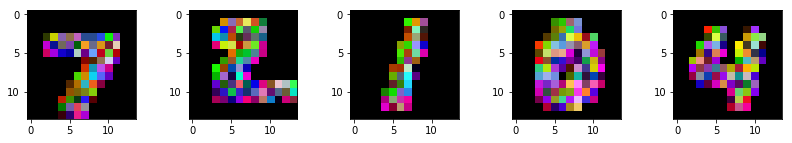

[Convolution Layer: conv2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


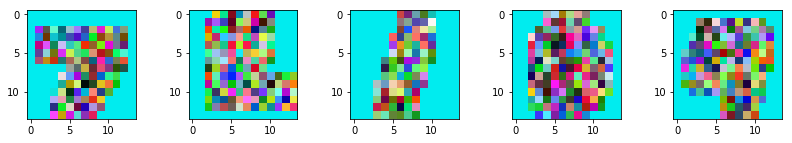

[Activation Layer: activation2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


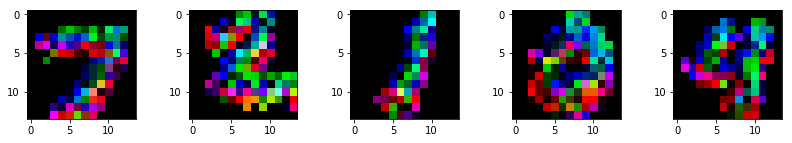

[Pooling Layer: pooling3]
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)


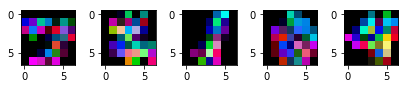

[Pooling Layer: reshape]
(1, 147)
(1, 147)
(1, 147)
(1, 147)
(1, 147)


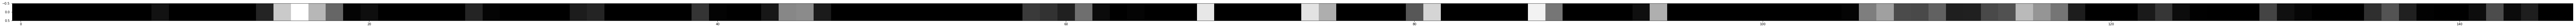

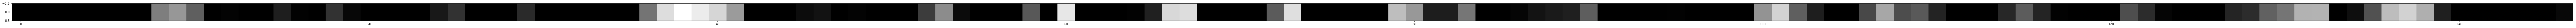

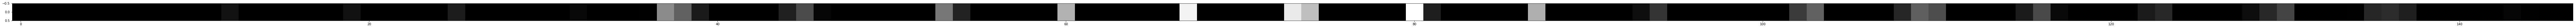

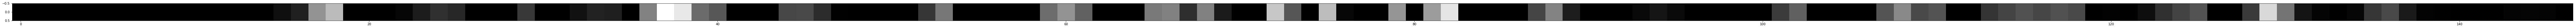

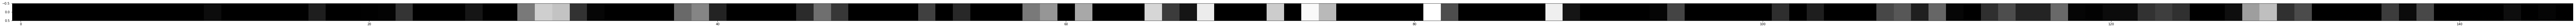

[Affine Layer: affine4]
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


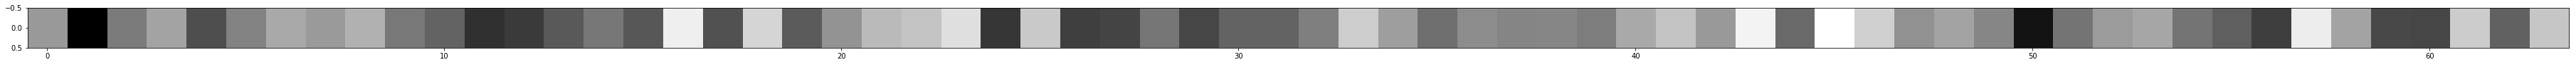

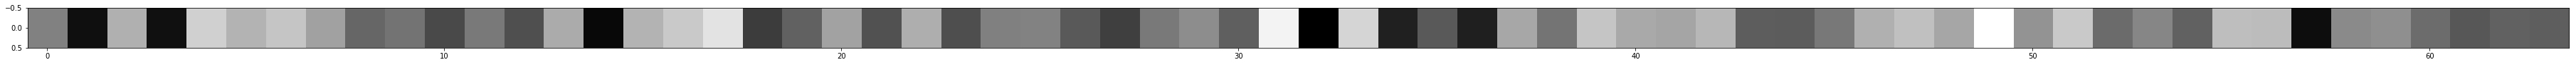

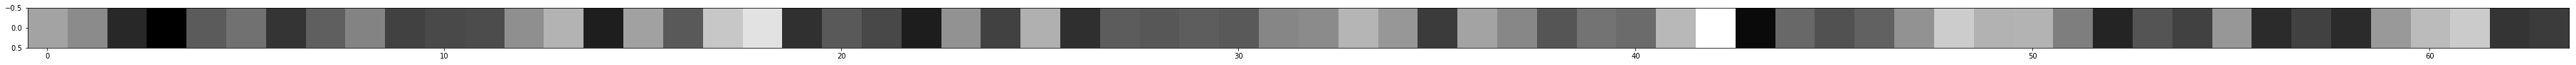

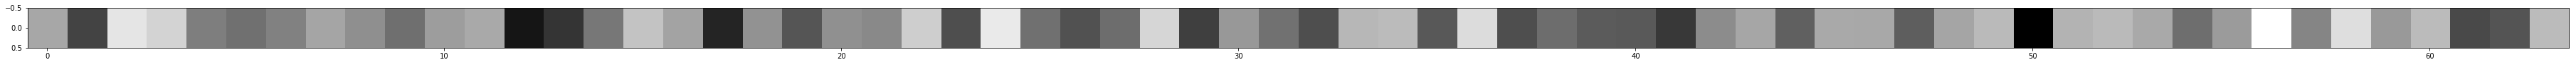

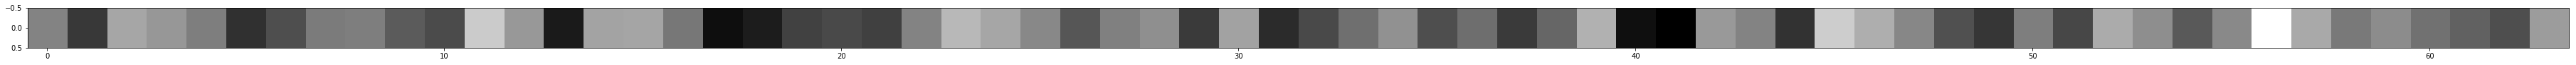

[Affine Layer: affine5]
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


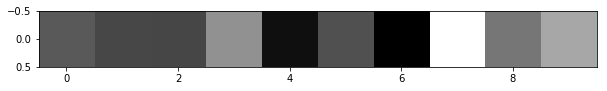

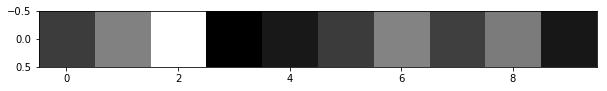

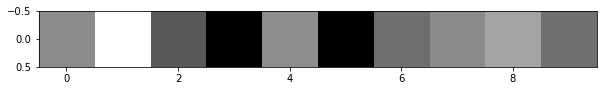

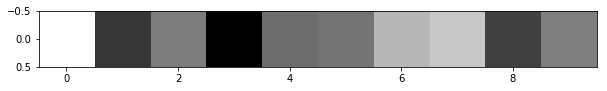

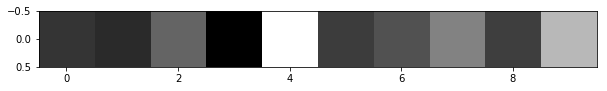

[Softmax Layer]
(1, 10) : [[  6.510e-14   1.966e-15   1.715e-15   1.640e-09   7.343e-20   1.072e-14
    4.164e-21   1.000e+00   1.228e-11   8.888e-08]]
(1, 10) : [[  4.171e-22   1.252e-14   1.000e+00   6.685e-29   3.547e-26   2.289e-22
    1.783e-14   6.330e-22   2.698e-15   2.383e-26]]
(1, 10) : [[  2.462e-07   1.000e+00   2.803e-10   2.160e-15   2.688e-07   2.617e-15
    4.785e-09   1.834e-07   5.245e-06   5.046e-09]]
(1, 10) : [[  9.999e-01   9.749e-15   6.026e-10   1.219e-18   5.633e-11   1.706e-10
    8.920e-06   1.064e-04   4.225e-14   8.109e-10]]
(1, 10) : [[  2.603e-16   4.261e-17   1.090e-12   2.254e-20   1.000e+00   1.154e-15
    4.399e-14   2.319e-10   1.459e-15   3.312e-06]]


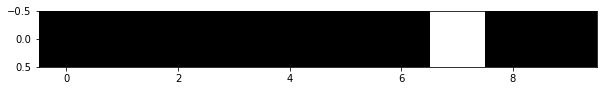

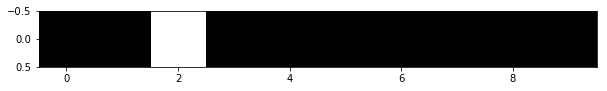

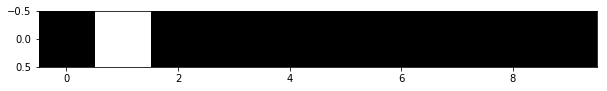

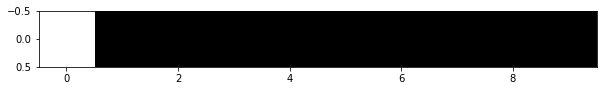

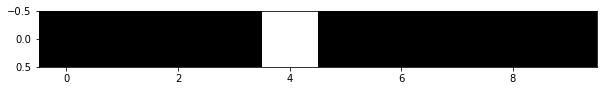

In [10]:
n.draw_filtered_images(test_inputs=data.test_input[:5], figsize=(20, 5))

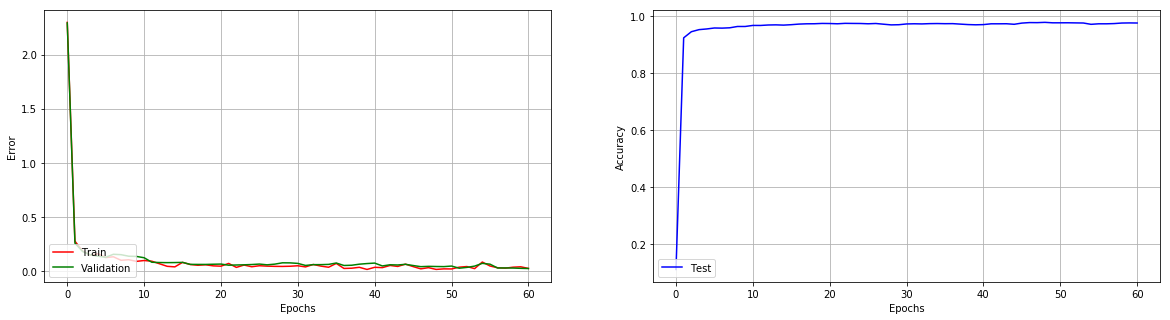

In [11]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 18, Prediction: Five, Ground Truth: Three
False Prediction Index: 20, Prediction: Seven, Ground Truth: Nine
False Prediction Index: 62, Prediction: Seven, Ground Truth: Nine
False Prediction Index: 87, Prediction: Seven, Ground Truth: Three
False Prediction Index: 149, Prediction: Four, Ground Truth: Two


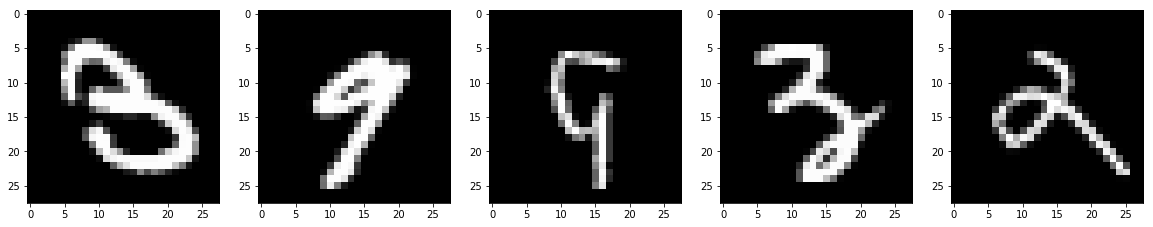

In [12]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

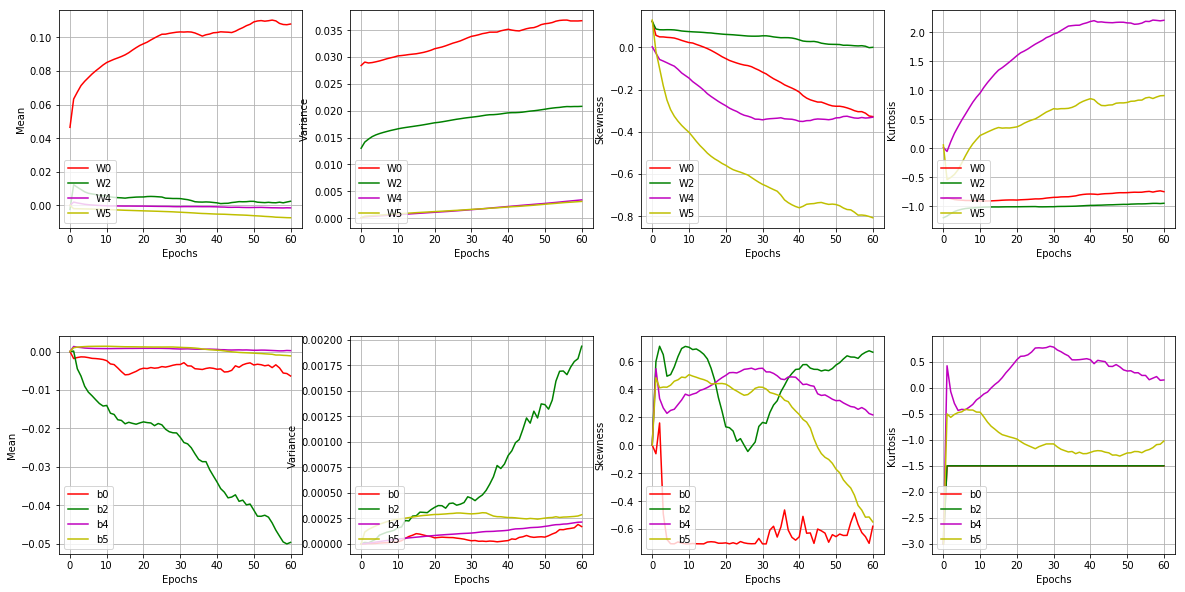

In [13]:
n.draw_param_description(figsize=(20, 10))

[conv0]
[activation0]
[pooling1]
[conv2]
[activation2]
[pooling3]
[reshape]
[affine4]
[activation4]
[affine5]


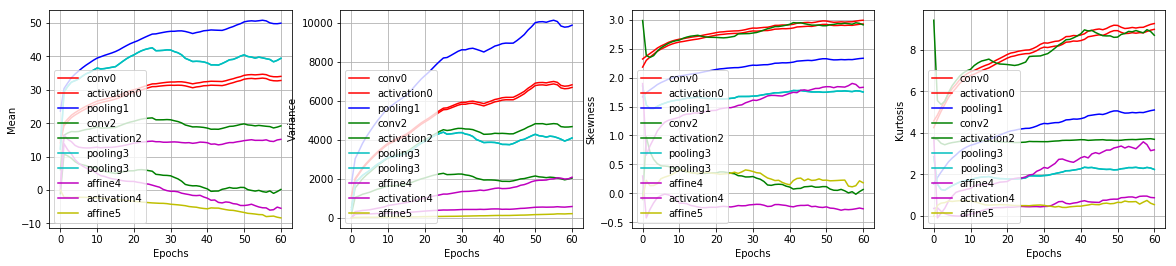

In [14]:
n.draw_output_description(figsize=(20, 10))